¡Hola, Luis!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Luis! Has hecho un excelente trabajo con el proyecto, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas d ehipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

Proposito del proyecto

Como proposito del proyecto entiendo que tenemos que saber que tarifa de prepago de surf y ultimate, genera mas ganancia para la compañia, para con esto determinar que areá podemos atacar para poder igualar o superar las ganancias ya sea mejorar el marketing o restructurar los paquetes dando mas datos, mensajes o llamadas priorizando la demanda de los usuarios que les interesa tener mas.  

## Inicialización

In [2]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import math 


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Cargar datos

In [3]:
# Carga los archivos de datos en diferentes DataFrames
mega_users = pd.read_csv('/datasets/megaline_users.csv', sep = ",") 
mega_plans = pd.read_csv('/datasets/megaline_plans.csv', sep = ",") 
mega_messages = pd.read_csv('/datasets/megaline_messages.csv', sep = ",") 
mega_internet = pd.read_csv('/datasets/megaline_internet.csv', sep = ",") 
mega_calls = pd.read_csv('/datasets/megaline_calls.csv', sep = ",")


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
mega_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [5]:
# Imprime una muestra de los datos para las tarifas
print(mega_plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

1.-Se observa que los tipos de datos que tienen se encuentran correctos y no cuenta con valores ausentes,lo que veo es que hay dos columnas que tienen la misma información estas son (usd_per_message y usd_per_minute), seria bueno tener mejor solo una tabla que diga que el precio de los mensajes y minutos si se excede sea de 0.03 y 0.01, aqui puedo renombrar una columna y eliminar la otra para quedarnos solo con una columna.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [6]:
#Vamos a renombrar la columna (usd_per_message) por el nombre usd_per_message_and_minute
mega_plans.rename(columns={'usd_per_message':'usd_per_message_and_minute'},inplace=True)

#Eliminamos la columba (usd_per_minute) ya que es redundate y tiene la misma informacion que usd_per_message

mega_plans.drop('usd_per_minute',axis=1,inplace=True)


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [7]:
#Verificamos los datos relizados con info()
mega_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   messages_included           2 non-null      int64  
 1   mb_per_month_included       2 non-null      int64  
 2   minutes_included            2 non-null      int64  
 3   usd_monthly_pay             2 non-null      int64  
 4   usd_per_gb                  2 non-null      int64  
 5   usd_per_message_and_minute  2 non-null      float64
 6   plan_name                   2 non-null      object 
dtypes: float64(1), int64(5), object(1)
memory usage: 244.0+ bytes


In [8]:
#Convirtiendo los megabytes a gigabytes para tener un mejor visualizacion de lo consumido por el usuario
mega_plans['mb_per_month_included'] = mega_plans['mb_per_month_included'] / 1024
#Con este cambio se renombra la columna a gb_per_month_included
mega_plans.rename(columns={'mb_per_month_included':'gb_per_month_included'},inplace=True)
#Volvemos a imprimir los valores para ver los cambios realizados.
print(mega_plans)

   messages_included  gb_per_month_included  minutes_included  \
0                 50                   15.0               500   
1               1000                   30.0              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message_and_minute plan_name  
0               20          10                        0.03      surf  
1               70           7                        0.01  ultimate  


Se realizo la conversion de megabytes a gigabytes para tener un mejor vistazo de los gigas consumidos por usuario y no tener una cantidad muy grande de numeros


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste! Solamente un gb son 1024 mb

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

De acuerdo, se corrige el valor a 1024 mb

## Usuarios/as

In [9]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
mega_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
# Imprime una muestra de datos para usuarios
print(mega_users.sample(2))


     user_id first_name last_name  age  \
182     1182       Jeff      Burt   39   
122     1122     Lashay     Reese   57   

                                              city    reg_date  plan  \
182          Charlotte-Concord-Gastonia, NC-SC MSA  2018-05-29  surf   
122  Miami-Fort Lauderdale-West Palm Beach, FL MSA  2018-03-04  surf   

    churn_date  
182        NaN  
122        NaN  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Se observa que solo hay dos columnas que tienen un tipo de datos erroneo estan son reg_date y Churn_date ya que estas columnas son fechas, se cambiara el tipo de dato a datetime  y se nota que los valores ausentes de la churn_date es porque se cancelo la suscripcion de ese paquete entonces podemos cambiarle el nombre a esos valores ausentes por otro mas representativo y no tener valores nulos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [11]:
#Cambiamos el tipo de datos de reg_date a datetime y le ponemos el formato dia mes y año
mega_users['reg_date'] = pd.to_datetime(mega_users['reg_date'], format='%Y-%m-%d')

#Cambiamos los valores ausentes de churn_date por "sin_uso"
mega_users['churn_date'].fillna('sin_uso', inplace=True)



C:\Users\sistemas\AppData\Local\Temp\ipykernel_26740\2157857603.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mega_users['churn_date'].fillna('sin_uso', inplace=True)


In [12]:
print(mega_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  
0 2018-12-24  ultimate    sin_uso  
1 2018-08-13      surf    sin_uso  
2 2018-10-21      surf    sin_uso  
3 2018-01-28      surf    sin_uso  
4 2018-05-23      surf    sin_uso  



<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [13]:
#Agregamos las columnas año, mes,dia y nombre del dia de la columna fecha de suscripcion
mega_users['month'] = mega_users['reg_date'].dt.month

#Volvemos a llamar a info() para ver los cambios realizados
mega_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
 8   month       500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(5)
memory usage: 33.3+ KB


## Llamadas

In [14]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
mega_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Imprime una muestra de datos para las llamadas
mega_calls.sample(5)


,id,user_id,call_date,duration
105186,1370_388,1370,2018-09-26,7.77
98312,1353_19,1353,2018-05-28,10.71
55245,1197_235,1197,2018-12-25,2.47
80534,1291_134,1291,2018-12-26,0.00
37387,1141_344,1141,2018-12-05,21.38


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

En la tabla llamadas se observa que la columna call_date tiene el tipo de datos erroneo ya esta como object vamos a cambiar el tipo a datetime. En los valores de la tabla duration que es la duración de las llamadas se ven muchos valores en cero. No se si tendra sentido tener esos valores con cero, creo que no aportan valor a los datos 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [16]:
#Se corrige el tipo de datos de la columna call_date a datetime
mega_calls['call_date'] = pd.to_datetime(mega_calls['call_date'], format='%Y-%m-%d')


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [17]:
#Agegamos las columnas año, mes,dia y nombre del dia de la fecha las llamadas
mega_calls['month'] = mega_calls['call_date'].dt.month

Las llamadas con duracion 0 pueden ser que en ese mes o dia no haya tenido llamadas o marcaron por error y colgaron y no llego a contabilizarse ese dato.

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Mensajes

In [18]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
mega_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Imprime una muestra de datos para los mensajes

print(mega_messages.sample(5))

             id  user_id message_date
16875   1112_57     1112   2018-11-28
75770    1494_8     1494   2018-09-13
8746    1065_17     1065   2018-09-29
74731   1483_65     1483   2018-07-18
55136  1347_173     1347   2018-10-30


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

En la tabla de mensajes vemos que aparece la fecha del SMS como object, vamos a cambiarlo a tipo datetime. El id de los mensajes esta en tipo object tambien será necesario cambiarlo a int

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [20]:
##Se corrige el tipo de datos de la columna message_date a datetime
mega_messages['message_date'] = pd.to_datetime(mega_messages['message_date'], format='%Y-%m-%d')


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [21]:
#Agregamos las columna mes de la fecha de los mensajes para poder hacer algunos calculos con ellos
mega_messages['month'] = mega_messages['message_date'].dt.month

## Internet

In [22]:
# Imprime la información general/resumida sobre el DataFrame de internet
mega_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [23]:
# Imprime una muestra de datos para el tráfico de internet
print(mega_internet.sample(5))


              id  user_id session_date  mb_used
17352    1078_18     1078   2018-11-25   292.91
63169   1291_294     1291   2018-08-06     0.00
11946    1059_46     1059   2018-08-30   161.89
100212    1475_5     1475   2018-07-26     0.00
23084   1106_357     1106   2018-10-30   403.02


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Al dar un vistazo a la informacion que tiene la tabla no se notan valores ausentes, solo se observa que el tipo de datos de la columna session_date deberia ser tipo datetime ya que es una fecha y esta esta como object.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [24]:
##Se corrige el tipo de datos de la columna session_date a datetime
mega_internet['session_date'] = pd.to_datetime(mega_internet['session_date'], format='%Y-%m-%d')

#Volvemos a llamar a info () para revisar si se cambio el tipo de dato
mega_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [25]:
#Agegamos las columna mes de la fecha de la sesion web
mega_internet['month'] = mega_internet['session_date'].dt.month

#Volvemos a llamar a info() para revisar las columnas creadas
mega_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 3.6+ MB


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

De acuerdo gracias por la observación ese dato si no lo habia pensado, ya se corrige en el codigo abajo donde hago la conjuncion de df.

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [26]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(mega_plans.head())


   messages_included  gb_per_month_included  minutes_included  \
0                 50                   15.0               500   
1               1000                   30.0              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message_and_minute plan_name  
0               20          10                        0.03      surf  
1               70           7                        0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [27]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
#juntamos las tablas users y llamadas con user_id
juntar_user_y_llamadas = mega_users.merge(mega_calls, on=['user_id','month'], how='outer')
#Agrupamos los datos por user_id y month y contamos el id de llamadas unico para cada usuario.
#contar_llamadas = juntar_user_y_llamadas.groupby(['user_id','month'])['id'].count()
#Guardamos los resultados en la variable contar_llamadas_df y le cambiamos el nombre a la columna por num_llamdas
#hago el ajuste usando pivot_table
contar_llamadas = juntar_user_y_llamadas.pivot_table(index=['user_id','month'], 
                                                 values=['id'], 
                                                 aggfunc= 'count').reset_index()
# Renombramos la columna del conteo a 'num_llamadas'
contar_llamadas_df = contar_llamadas.rename(columns={'id': 'num_llamadas'})
#Le cambiamos el tipo de datos a la columna month a int
contar_llamadas['month'] = contar_llamadas_df['month'].astype(int)
#Imprimimos un ejemplo con sample
print(contar_llamadas_df.head(15))



    user_id  month  num_llamadas
0      1000     12            16
1      1001      8            27
2      1001      9            49
3      1001     10            65
4      1001     11            64
5      1001     12            56
6      1002     10            11
7      1002     11            55
8      1002     12            47
9      1003      1             0
10     1003     12           149
11     1004      5            21
12     1004      6            44
13     1004      7            49
14     1004      8            49


Enterado se ajusta la agrupacion con pivot table.


<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

In [28]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
contar_minutos = juntar_user_y_llamadas.groupby(['user_id','month'])['duration'].sum()
contar_minutos = contar_minutos.reset_index(name='minutes_total')

#Renondeamos para arriba los minutos de las llamadas usando math y ceil lo acemos con un apply
contar_minutos['minutes_total'] = contar_minutos['minutes_total'].apply(math.ceil)

print(contar_minutos)


      user_id  month  minutes_total
0        1000     12            117
1        1001      8            172
2        1001      9            298
3        1001     10            375
4        1001     11            405
...       ...    ...            ...
2513     1499      5              0
2514     1499      9            331
2515     1499     10            364
2516     1499     11            289
2517     1499     12            469

[2518 rows x 3 columns]


In [29]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
#Hacemos un merge con las tablas usuarios y mensajes
usuarios_y_mensajes = mega_users.merge(mega_messages, on= ['user_id','month'], how='outer')
#agrupamos por user_id y contamos los id unicos para cada mensaje
usuarios_y_mensajes = usuarios_y_mensajes.groupby(['user_id','month'])['id'].count()
#Renombramos la columna resultante con el nombre total_mensajes
usuarios_y_mensajes = usuarios_y_mensajes.reset_index(name='total_mensajes')
print(usuarios_y_mensajes.head(11))


    user_id  month  total_mensajes
0      1000     12              11
1      1001      8              30
2      1001      9              44
3      1001     10              53
4      1001     11              36
5      1001     12              44
6      1002     10              15
7      1002     11              32
8      1002     12              41
9      1003      1               0
10     1003     12              50


In [30]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
usuarios_y_internet = mega_users.merge(mega_internet, on= ['user_id','month'], how='outer')
#Agrupamos por user_id y sumamos los megas usados por cada usuario
usuarios_y_internet = usuarios_y_internet.groupby(['user_id','month'])['mb_used'].sum()
#Renombramos la columna con nombre de total_datos
usuarios_y_internet = usuarios_y_internet.reset_index(name='total_gbs')


#Convertimos los megabytes a gigabytes
usuarios_y_internet['total_gbs'] = usuarios_y_internet['total_gbs'] / 1024  #tengo duda si dejarlo en 1000 o 1024


#Vamos a redondear para arriba los valores de la columna total_mbs
usuarios_y_internet['total_gbs'] = usuarios_y_internet['total_gbs'].apply(math.ceil)

print(usuarios_y_internet.head(11))


    user_id  month  total_gbs
0      1000     12          2
1      1001      8          7
2      1001      9         14
3      1001     10         22
4      1001     11         19
5      1001     12         19
6      1002     10          7
7      1002     11         19
8      1002     12         15
9      1003      1          0
10     1003     12         27


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [31]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
fusionar_datos = contar_llamadas_df.merge(usuarios_y_internet, on=['user_id','month'], how='inner')\
                                   .merge(usuarios_y_mensajes, on=['user_id','month'], how='left')\
                                   .merge(contar_minutos, on=['user_id','month'], how='left')

print(fusionar_datos.head(11))


    user_id  month  num_llamadas  total_gbs  total_mensajes  minutes_total
0      1000     12            16          2            11.0            117
1      1001      8            27          7            30.0            172
2      1001      9            49         14            44.0            298
3      1001     10            65         22            53.0            375
4      1001     11            64         19            36.0            405
5      1001     12            56         19            44.0            393
6      1002     10            11          7            15.0             55
7      1002     11            55         19            32.0            360
8      1002     12            47         15            41.0            364
9      1003      1             0          0             0.0              0
10     1003     12           149         27            50.0           1041


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [32]:
# Añade la información de la tarifa
total = mega_users.merge(fusionar_datos, on= 'user_id', how='inner')
total = total[['user_id','month_y','num_llamadas','total_gbs','total_mensajes','minutes_total','plan','city']]
total.rename(columns={'month_y':'month'},inplace=True)
print(total.head(10))


   user_id  month  num_llamadas  total_gbs  total_mensajes  minutes_total  \
0     1000     12            16          2            11.0            117   
1     1001      8            27          7            30.0            172   
2     1001      9            49         14            44.0            298   
3     1001     10            65         22            53.0            375   
4     1001     11            64         19            36.0            405   
5     1001     12            56         19            44.0            393   
6     1002     10            11          7            15.0             55   
7     1002     11            55         19            32.0            360   
8     1002     12            47         15            41.0            364   
9     1003      1             0          0             0.0              0   

       plan                                   city  
0  ultimate  Atlanta-Sandy Springs-Roswell, GA MSA  
1      surf        Seattle-Tacoma-Bellevue, WA

In [33]:
total.isna().sum()

user_id             0
month               0
num_llamadas        0
total_gbs           0
total_mensajes    435
minutes_total       0
plan                0
city                0
dtype: int64

In [34]:
total['total_mensajes'].fillna(0,inplace= True)
total.isna().sum()

C:\Users\sistemas\AppData\Local\Temp\ipykernel_26740\4133355290.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total['total_mensajes'].fillna(0,inplace= True)


user_id           0
month             0
num_llamadas      0
total_gbs         0
total_mensajes    0
minutes_total     0
plan              0
city              0
dtype: int64

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [35]:
# Calcula el ingreso mensual para cada usuario 
limite_gratuito_minutos = {'surf': 500, 'ultimate': 3000}  
limite_gratuito_mensajes = {'surf': 50, 'ultimate': 1000}
limite_gratuito_datos_mb = {'surf': 15.36, 'ultimate': 30.72} #Límites en GB
tarifas_mensuales = {'surf': 20.0, 'ultimate': 70.0}

def calcular_ingresos_actualizado(row):
    plan = row['plan']
    minutos_total = row['minutes_total']
    total_mensajes = row['total_mensajes']
    total_mbs = row['total_gbs']

    tarifa_mensual = tarifas_mensuales[plan]
    costo_adicional = 0

    # Calcular costo por minutos extra
    if minutos_total > limite_gratuito_minutos[plan]:
        exceso_minutos = np.ceil(minutos_total - limite_gratuito_minutos[plan])
        if plan == 'surf':
            costo_adicional += exceso_minutos * 0.30
        elif plan == 'ultimate':
            costo_adicional += exceso_minutos * 0.10

    # Calcular costo por mensajes extra
    if total_mensajes > limite_gratuito_mensajes[plan]:
        exceso_mensajes = total_mensajes - limite_gratuito_mensajes[plan]
        if plan == 'surf':
            costo_adicional += exceso_mensajes * 0.30
        elif plan == 'ultimate':
            costo_adicional += exceso_mensajes * 0.10

    # Calcular costo por datos extra (redondeo hacia arriba a GB)
    if total_mbs > limite_gratuito_datos_mb[plan]:
        exceso_mbs = total_mbs - limite_gratuito_datos_mb[plan]
        exceso_gb = np.ceil(exceso_mbs / 1024)
        if plan == 'surf':
            costo_adicional += exceso_gb * 10
        elif plan == 'ultimate':
            costo_adicional += exceso_gb * 7

    ingresos_mensuales = tarifa_mensual + costo_adicional
    return ingresos_mensuales

# Aplicar la función actualizada al DataFrame
total['ingresos_mensuales'] = total.apply(calcular_ingresos_actualizado, axis=1)

print(total[['user_id','month','ingresos_mensuales']].head(20))



    user_id  month  ingresos_mensuales
0      1000     12                70.0
1      1001      8                20.0
2      1001      9                20.0
3      1001     10                30.9
4      1001     11                30.0
5      1001     12                30.0
6      1002     10                20.0
7      1002     11                30.0
8      1002     12                20.0
9      1003      1                20.0
10     1003     12               192.3
11     1004      5                20.0
12     1004      6                30.0
13     1004      7                30.0
14     1004      8                30.0
15     1004      9                30.0
16     1004     10                20.0
17     1004     11                30.0
18     1004     12                30.0
19     1005     11                20.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el calculo del ingreso mensual por usuario. Además, antes redondeas las variables de duración de llamadas y gb    

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

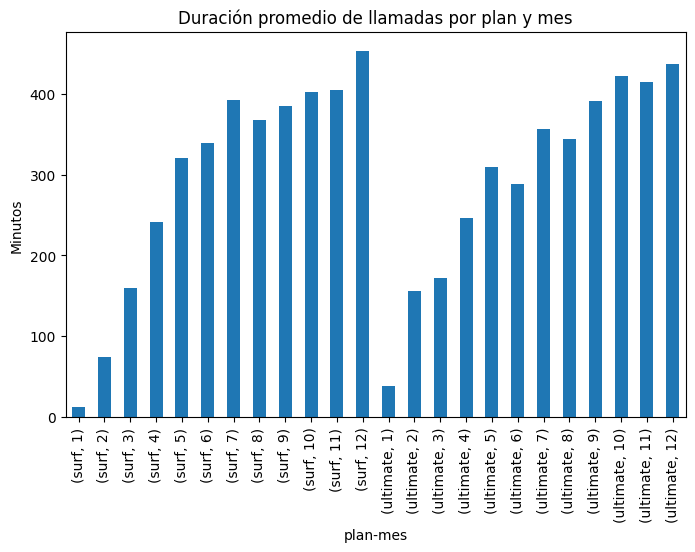

In [36]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
Promedio_llamadas = total.groupby(['plan','month'])['minutes_total'].mean()

Promedio_llamadas.plot(kind='bar',
    figsize=(8, 5))
plt.title('Duración promedio de llamadas por plan y mes')
plt.xlabel('plan-mes')
plt.ylabel('Minutos')
plt.show()



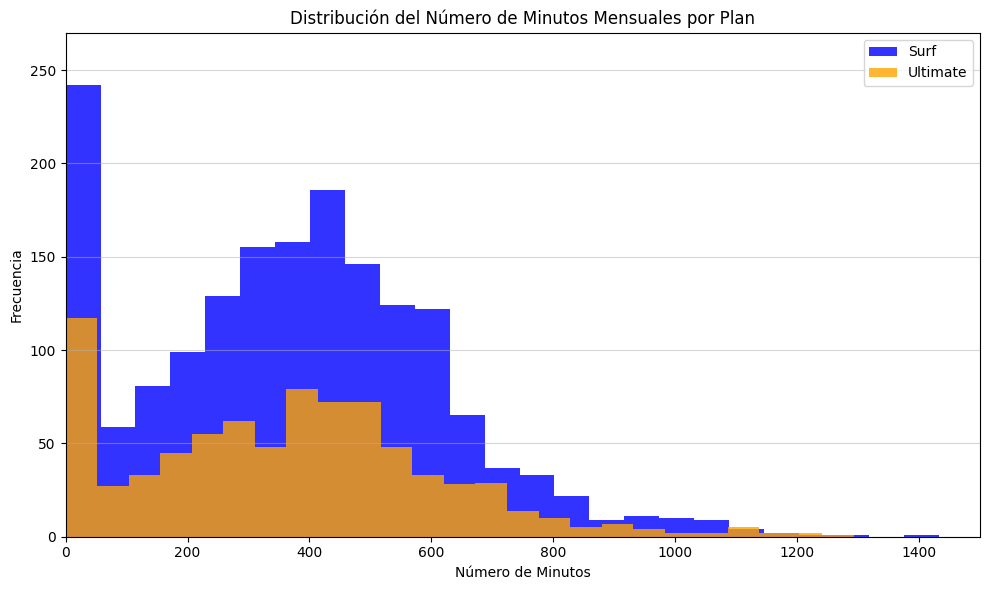

In [37]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
numero_minutos_surf = total[total['plan'] =='surf']['minutes_total']
numero_minutos_ultimate = total[total['plan'] =='ultimate']['minutes_total']

plt.figure(figsize=(10, 6))
plt.hist(numero_minutos_surf, bins=25, alpha=0.8, label='Surf', color='blue')
plt.hist(numero_minutos_ultimate, bins=25, alpha=0.8, label='Ultimate', color='orange')

plt.title('Distribución del Número de Minutos Mensuales por Plan')
plt.xlabel('Número de Minutos')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xlim(0, 1500)
plt.ylim(0, 270)   
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [38]:
# Calcula la media y la varianza de la duración mensual de llamadas.
#calculamos la varianza y media para el plan surf
media_llamadas_mes = total[total['plan']=='surf']['minutes_total'].mean()
varianza_mes = total[total['plan']=='surf']['minutes_total'].var()
#calculamos la varianza y media para el plan ultimate
media_llamadas_mes_ultimate = total[total['plan']=='ultimate']['minutes_total'].mean()
varianza_mes_ultimate = total[total['plan']=='ultimate']['minutes_total'].var()


print(f'Plan Surf: La media de la duracion mensual de llamadas es:{media_llamadas_mes:.2f}')
print(f'Plan Surf: La varianza de la duracion mensual de llamadas es:{varianza_mes:,.2f}')
print(f'Plan Ultimate: La media de las llamadas es:{media_llamadas_mes_ultimate:.2f}')
print(f'Plan Ultimate: La varianza de las llamadas es:{varianza_mes_ultimate:,.2f}')


Plan Surf: La media de la duracion mensual de llamadas es:371.14
Plan Surf: La varianza de la duracion mensual de llamadas es:57,759.21
Plan Ultimate: La media de las llamadas es:365.12
Plan Ultimate: La varianza de las llamadas es:61,564.32


In [39]:
#Rellenamos los valores vacios de minutes_total
total['minutes_total'].fillna(0,inplace=True)
nulos = total['minutes_total'].isnull().sum()
print(nulos)

0


C:\Users\sistemas\AppData\Local\Temp\ipykernel_26740\1139397836.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total['minutes_total'].fillna(0,inplace=True)


C:\Users\sistemas\AppData\Local\Temp\ipykernel_26740\2406437539.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([duracion_surf,duracion_ultimate], labels=['surf','ultimate'])


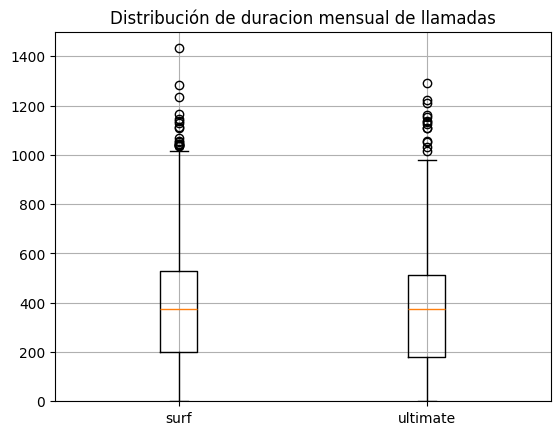

In [40]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
duracion_surf = total[total['plan'] == 'surf']['minutes_total']
duracion_ultimate = total[total['plan'] == 'ultimate']['minutes_total']

plt.boxplot([duracion_surf,duracion_ultimate], labels=['surf','ultimate'])
plt.title('Distribución de duracion mensual de llamadas')
plt.ylim([0,1500])
plt.grid(True)
plt.show()


In [41]:
duracion_surf

1       172
2       298
3       375
4       405
5       393
       ... 
2503      0
2504    331
2505    364
2506    289
2507    469
Name: minutes_total, Length: 1706, dtype: int64

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

1.- Se tiene una distribucion de las llamadas algo atipicas se encuentras varios valores atipicos en ambos planes por arriba de las 1000 llamadas y la media esta cerca de los 400 y la mayoria de los valores para ambos se concentran entre 250 a 550 aprox. 
2.- En cuanto al numero de minutos usados por cada plan vemos que en el plan de surf tiene un mayor numero de mensajes enviados a comparacion del plan ultimate.
3.- En cuanto a la duracion de las llamadas estas se hacen mas por los meses de noviembre y diciembre y todavia un poco en Enero, pero casi los dos planes cuentan casi con las mismas frecuencias de duracion de llamadas. 

### Mensajes

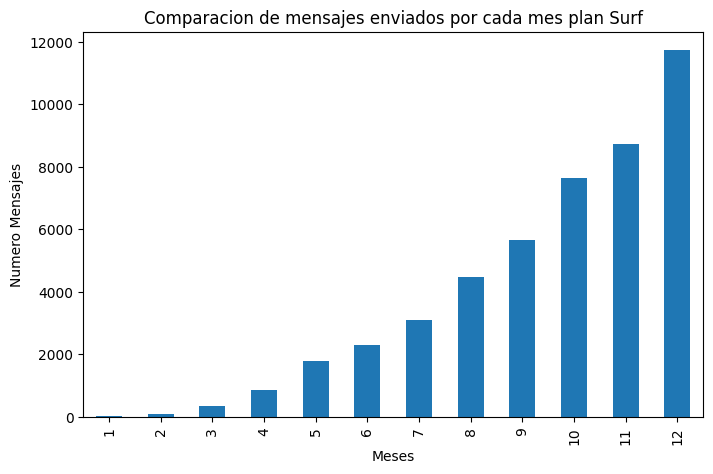

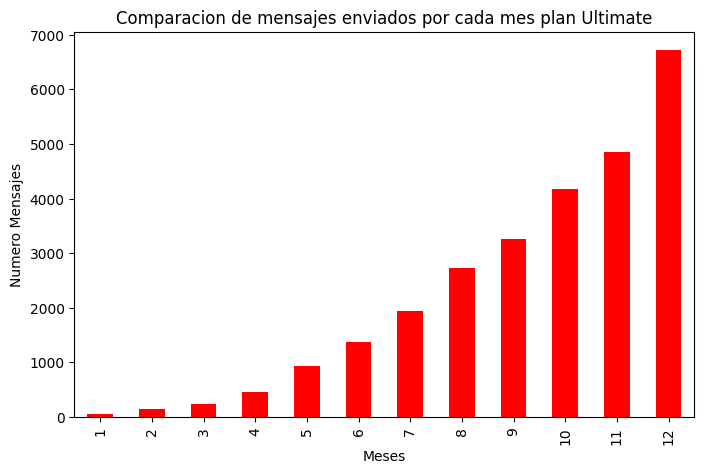

count       12.000000
mean      3897.166667
std       3826.889500
min         21.000000
25%        740.250000
50%       2695.000000
75%       6162.750000
max      11731.000000
Name: total_mensajes, dtype: float64
count      12.000000
mean     2242.916667
std      2148.194229
min        62.000000
25%       408.000000
50%      1658.000000
75%      3489.000000
max      6718.000000
Name: total_mensajes, dtype: float64


In [42]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mensajes_mes_surf = total[total['plan'] == 'surf'].groupby('month')['total_mensajes'].sum()
mensajes_mes_ultimate = total[total['plan'] =='ultimate'].groupby('month')['total_mensajes'].sum()


mensajes_mes_surf.plot(kind='bar',figsize=(8, 5))
plt.title('Comparacion de mensajes enviados por cada mes plan Surf')
plt.xlabel('Meses')
plt.ylabel('Numero Mensajes')

plt.show()

mensajes_mes_ultimate.plot(kind='bar',figsize=(8, 5), color= 'red')
plt.title('Comparacion de mensajes enviados por cada mes plan Ultimate')
plt.xlabel('Meses')
plt.ylabel('Numero Mensajes')
plt.show()

print(mensajes_mes_surf.describe())
print(mensajes_mes_ultimate.describe())



1.- Se nota que sigue variando el numero de mensajes entre ambos planes tenemos que los usuarios del plan surf envian un mayor numero de mensajes con un promedio de 3,897 a comparacion del plan ultimate que envia en promedio 2,242 teniendo en el plan surf un maximo 11,731, pero igual vemos en las dos graficas que es un crecimiento ascendente mes con mes para ambos planes.
2.-   Se tiene que ambos planes tienen mas demanda en los meses de noviembre y diciembre sera que mandan felicitaciones y estan mas en contacto con sus seres queridos en esas epocas decembrinas.


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

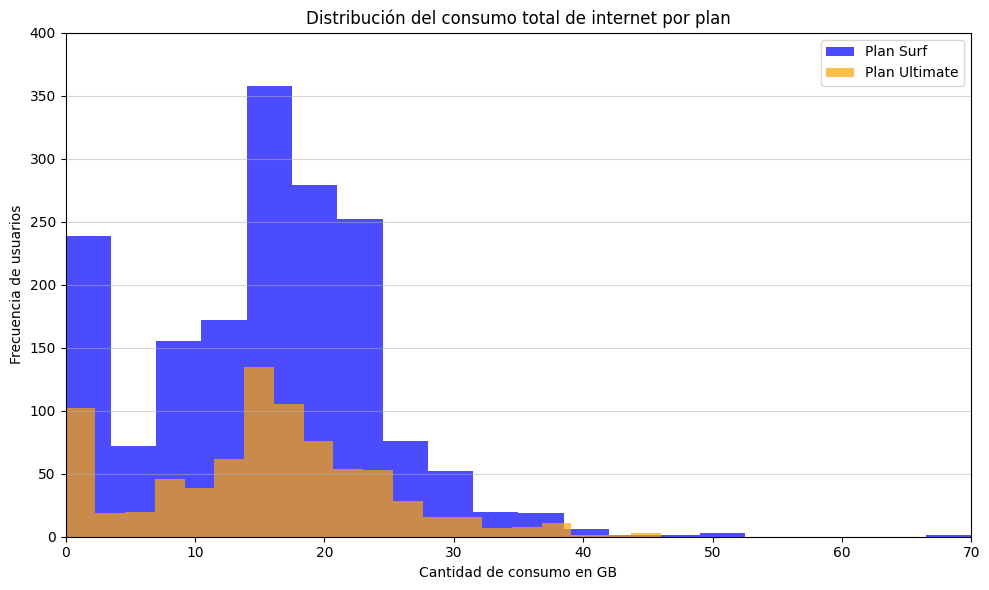

In [43]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Datos de consumo de internet para el plan Surf
consumo_surf = total[total['plan'] == 'surf']['total_gbs']

# Datos de consumo de internet para el plan Ultimate
consumo_ultimate = total[total['plan'] == 'ultimate']['total_gbs']

plt.figure(figsize=(10, 6))
plt.hist(consumo_surf, bins=20, alpha=0.7, label='Plan Surf', color='blue')
plt.hist(consumo_ultimate, bins=20, alpha=0.7, label='Plan Ultimate', color='orange')

plt.title('Distribución del consumo total de internet por plan')
plt.xlabel('Cantidad de consumo en GB')
plt.ylabel('Frecuencia de usuarios')
plt.xlim(0, total['total_gbs'].max()) # Ajustar límite x al máximo valor
plt.ylim(0, 400)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Al parecer el trafico de internet si varia mucho para ambos planes vemos que el plan Surf consume mucho mas datos de internet  la mayoria de los datos consumidos por el plan surf estan concentrados entre 10 GB y 30 GB. En cuanto al plan ultimate se ve que el consumo de internet es menor ya que el promedio de datos consumidos en el plan ultimate esta en 15.38 GB casi la mitad del plan que tienen de 30 GB y los del plan surf el promedio de consumo es de 14.97 GB casi el 100 % de los GB datos en su plan. Tambien aparecen algunos valores atipicos en cada plan el consumo maximo del plan surf fue de 70 GB y el de ultimate de 46 GB. Bueno tambien tenemos en cuenta que la mayorita de los usuarios tienen el plan de surf con un 69 % de los usuarios y el 31 % de ultimate.  

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [44]:
#visualizamos los ingresos filtrando el plan e ingresos y usamos describe
ingresos_surf = total[total['plan'] == 'surf']['ingresos_mensuales']
ingresos_ultimate = total[total['plan'] == 'ultimate']['ingresos_mensuales']

print("Estadísticas Descriptivas - Plan Surf:")
print(ingresos_surf.describe())
print("\nEstadísticas Descriptivas - Plan Ultimate:")
print(ingresos_ultimate.describe())

Estadísticas Descriptivas - Plan Surf:
count    1706.000000
mean       40.545780
std        35.124597
min        20.000000
25%        20.000000
50%        30.000000
75%        41.400000
max       332.100000
Name: ingresos_mensuales, dtype: float64

Estadísticas Descriptivas - Plan Ultimate:
count    802.000000
mean      70.349127
std        1.524762
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max       77.000000
Name: ingresos_mensuales, dtype: float64


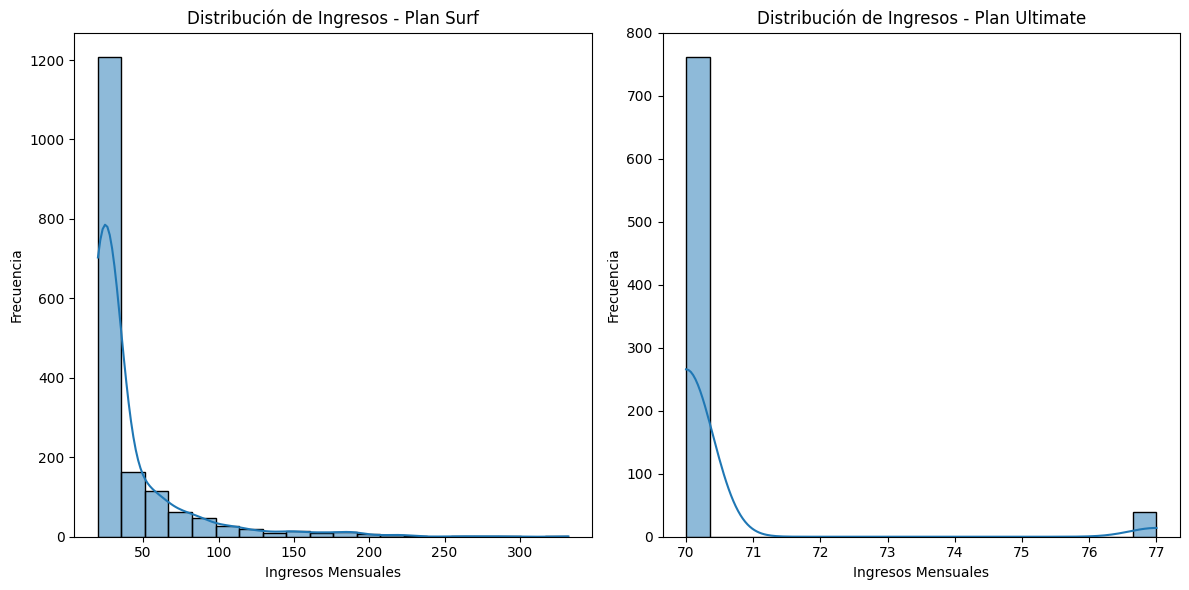

In [45]:
#Usamos visualizacion y mostramos los resultados de los ingresos con un histograma
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(ingresos_surf, bins=20, kde=True)
plt.title('Distribución de Ingresos - Plan Surf')
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(ingresos_ultimate, bins=20, kde=True)
plt.title('Distribución de Ingresos - Plan Ultimate')
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

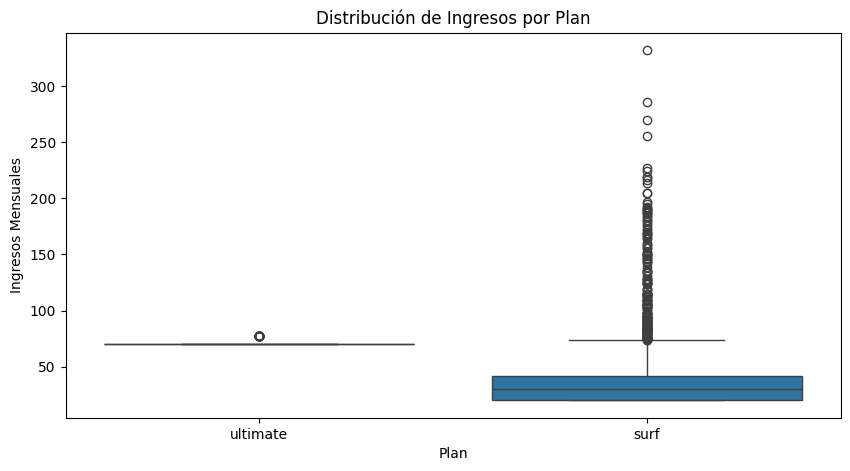

In [46]:
#Usando el grafico de bigotes
plt.figure(figsize=(10, 5))
sns.boxplot(x='plan', y='ingresos_mensuales', data=total)
plt.title('Distribución de Ingresos por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos Mensuales')
plt.show()

In [47]:
#Ingresos totales por cada plan 
ingresos_plan_surf =  total[total['plan']== 'surf']['ingresos_mensuales'].sum()
ingresos_plan_ultimate = total[total['plan'] == 'ultimate']['ingresos_mensuales'].sum()

print(f'Los ingresos totales por el plan Surf son:{ingresos_plan_surf:,.2f}')
print(f'Los ingresos totales por el plan ultimate son:{ingresos_plan_ultimate:,.2f}')

ingresos_plan_surf_prom =  total[total['plan']== 'surf']['ingresos_mensuales'].mean()
print()
ingresos_plan_ultimate_prom = total[total['plan'] == 'ultimate']['ingresos_mensuales'].mean()
print(f'Los ingresos totales promedio por el plan Surf son:{ingresos_plan_surf_prom:,.2f}')
print(f'Los ingresos totales promedio por el plan ultimate son:{ingresos_plan_ultimate_prom:,.2f}')

Los ingresos totales por el plan Surf son:69,171.10
Los ingresos totales por el plan ultimate son:56,420.00

Los ingresos totales promedio por el plan Surf son:40.55
Los ingresos totales promedio por el plan ultimate son:70.35


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

1.- En los ingresos para ambos planes se nota que la mayoriria no se termina el plan que tienen tanto de datos, minutos y llamadas, ya que la mayoria de los ingresos se concentran en el costo total de ambos paquetes como Surf los ingresos se encuentran entre 20 y 110 y en el caso de ultimate se encuentran entre 70 y por 200. Pero se notan varios valores atipicos en el plan de surf. 

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones. En este caso las gráficas de box-plots nos ayudan a identificar outiers que pueden sesgar nuestros resultados, especificamente las pruebas de hipótesis. Es por ello que con estás gráficas puedes complementar el análisis eliminando los valores atipicos. 
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [48]:
# Prueba las hipótesis
#comenzamos con la hipotesis nula ¿son diferentes los ingresos promedios en ultimate y surf?
ingresos_plan_surf_hipo =  total[total['plan'] == 'surf']['ingresos_mensuales']
ingresos_plan_ultimate_hipo =  total[total['plan'] == 'ultimate']['ingresos_mensuales']

alpha = 0.05 # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis

results = st.ttest_ind(ingresos_plan_surf_hipo, ingresos_plan_ultimate_hipo,equal_var=False)
print('valor p: ',results.pvalue) # extraer el valor p

if (results.pvalue < alpha): # compara el valor p con el umbral alpha
    print('Rechazamos la hipótesis nula')
else: 
    print("No podemos rechazar la hipótesis nula")






valor p:  7.269364030836801e-203
Rechazamos la hipótesis nula



<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre planes.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

1.- Para responder la pregunta de porque se uso esta hipotesis ttest_ind. 
Estaba investigando que libreria podria ocupar y encontre que esta comparaba la media de dos grupos independientes para conocer la relacion estadisticas entre ambas, el valor de alpha lo defini en 5% para ambos problemas.
2.- Como criterio que utilice es porque es la que habiamos visto en clase, se me hace facil implementarla. 
Ya terminando como resultado salio que No podemos rechazar la hipotesis nula, ya que el valor de p es superior al 5 % previsto
queriendo decir que si existe mucha diferencia entre el promedio de ingresos totales entre ambos planes con 35% de diferencia entre ambos, las personas estaran mas interesadas en no pagar por un plan caro si no usar y el mas basico y pagar el excedente de megas,mensajes y llamadas.

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [49]:
# Prueba las hipótesis
# Crear grupos basados en la región NY-NJ
ingresos_nynj = total[total['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['ingresos_mensuales']
ingresos_otras_regiones = total[total['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['ingresos_mensuales']

# Definir el nivel alfa
alpha = 0.05

# Realizar la prueba t de Student para muestras independientes
results = st.ttest_ind(ingresos_nynj, ingresos_otras_regiones,equal_var=False)

# Imprimir los resultados
print('Valor p:', results.pvalue*100,'%')

# Tomar una decisión basada en el valor p y alfa
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula.')
    print('Hay evidencia estadística para sugerir que el ingreso promedio de los usuarios de NY-NJ es diferente al de otras ciudades.')
else:
    print('No podemos rechazar la hipótesis nula.')
    print('No hay suficiente evidencia estadística para afirmar que el ingreso promedio de los usuarios de NY-NJ es diferente al de otras ciudades.')


Valor p: 0.00010212368048655419 %
Rechazamos la hipótesis nula.
Hay evidencia estadística para sugerir que el ingreso promedio de los usuarios de NY-NJ es diferente al de otras ciudades.



<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre planes.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

1.- La hipotesis se formulo primero segmentando los ingresos de NY-NJ y los que son diferentes a esta ciudad para con esto hacer la hipotesis sobre ambas.
2.- Se utilizo la misma libreria de st.ttest_ind y se utilizo el mismo valor de alpha de 5%.
Como conclusion en esta ocacion se Rechazo la hipotesis nula ya que el valor de P esta por debajo bueno casi llegaba a 5%.
Y si el ingreso promedio de los usuarios de la ciudad de NY-NJ es diferente a la del resto de ciudades


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Conclusiones 
1.- Variacion del comportamiento de los usuarios respecto a las llamadas, varia en funcion de su plan surf e ultimate.
El comportamiento de los usuarios en cuanto a las llamadas presenta similitudes entre ambos planes. Si bien existen valores atípicos con un número elevado de llamadas en ambos grupos y la mayoría de los usuarios se concentra en un rango de 250 a 550 llamadas, la frecuencia en la duración de las llamadas es similar entre los planes, con un ligero aumento en los meses de noviembre, diciembre. Esto sugiere que el plan contratado no influye significativamente en la cantidad o duración típica de las llamadas realizadas por los usuarios, aunque algunos individuos, independientemente del plan, realizan un volumen considerablemente mayor de llamadas.

2.- Variacion del consumo de mensajes que envian en cuanto al plan surf e ultimate
Se observa una clara diferencia en el consumo de mensajes entre los planes. Los usuarios del plan Surf envían significativamente más mensajes en promedio (3,897) en comparación con los usuarios del plan Ultimate (2,242). Además, el plan Surf presenta un valor máximo de mensajes enviados considerablemente mayor. A pesar de esta diferencia en la cantidad, ambos planes muestran una tendencia ascendente en el envío de mensajes a lo largo de los meses, con un pico notable en noviembre y diciembre, lo que podría atribuirse a la temporada festiva. Por lo tanto, el plan sí influye en la cantidad de mensajes enviados, siendo los usuarios del plan Surf quienes generan un mayor volumen.
3.- Variacion del consumo de internet en cuanto al plan surf e ultimate
El consumo de internet varía considerablemente entre los planes. Los usuarios del plan Surf tienden a consumir una cantidad similar de datos (promedio de 14.97 GB) acercándose al límite de su plan (30 GB), con una alta concentración de consumo entre 10 GB y 30 GB y un valor atípico de consumo máximo mucho mayor. En contraste, los usuarios del plan Ultimate, a pesar de tener una mayor asignación de datos (30 GB), consumen en promedio una cantidad ligeramente superior (15.38 GB), lo que representa aproximadamente la mitad de su límite, con un valor atípico máximo menor. Dado que la mayoría de los usuarios tienen el plan Surf (69%), el consumo total de datos en este plan es mayor. Esto indica que el plan influye en el patrón de consumo, con los usuarios de Surf utilizando una mayor proporción de sus datos asignados.
4.- Como difiere el ingreso entre planes
La mayoría de los usuarios en ambos planes no agotan por completo sus asignaciones de datos, minutos y llamadas, ya que los ingresos se concentran principalmente en el costo base de los paquetes. En el plan Surf, los ingresos por usuario se sitúan generalmente entre $20 y $110, mientras que en el plan Ultimate el rango es más amplio, entre $20 y $200. La presencia de valores atípicos en los ingresos del plan Surf sugiere que algunos usuarios generan ingresos adicionales, posiblemente por exceder sus límites. A pesar de una diferencia promedio del 11.22% en los ingresos totales entre ambos planes, la mayor proporción de usuarios en el plan Surf contribuye significativamente a los ingresos generales, lo que podría indicar una preferencia por un plan más económico con la posibilidad de pagar por excedentes.

Como conclusion final de este analisis, llegue a la conclusion que el plan que genera mas ingresos es el plan SURF pero esto considerando que el 69 % de los clientes tiene este plan surf y solo el 31% el plan ultimate lo supera por el doble usuarios ya que solo 151 clientes tiene el plan ultimate y los 349 restantes el plan surf.

Nota: tuve muchas dudas en como conjuntar los DF con merge, cuando ocupamos rigth, left, inner u outer. Ya que moviendo esto me cambia los valores de un DF a otro.


